In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np
from natsort import natsorted
from torchvision.datasets import ImageFolder
from torch import optim
from PIL import Image
import pandas as pd

In [2]:
DF_player_info=pd.read_csv('./dataset/demographics.csv')

In [3]:
DF_player_info

,subID,age,environment,street,city,still_live,city_current,city_current_type,gender,environment_current_binary,environment_binary,education
0,545d67,24,City,Eureka Avenue,San Bernardino,Yes,San Bernardino,City,Male,City,City,Tertiary
1,558980,33,Suburbs,Third Ave,Croydon,Yes,Croydon,Suburban,Male,NonCity,NonCity,Secondary
2,55b312,53,Suburbs,Friar Avenue,Fayetteville,No,Port Richey,Suburban,Female,NonCity,NonCity,Tertiary
3,5642af,32,Suburbs,Waters Edge,Kissimmee,No,Orlando,Suburban,Male,NonCity,NonCity,Tertiary
4,564d1f,45,Rural,Bier Rd.,Oak Harbor,No,Oak Harbor,City,Male,City,NonCity,Tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...
594,6132bc,22,Suburbs,5th,Ecorse,No,Romulus,Suburban,Male,NonCity,NonCity,Tertiary
595,6132e2,30,Mix,Emperor,San Gabriel,No,Gardena,Suburban,Female,NonCity,NonCity,Tertiary
596,613332,21,Suburbs,Brook Run,Louisville,Yes,Louisville,Suburban,Male,NonCity,NonCity,Secondary
597,61344e,20,Suburbs,Witham Court,Charlotte,Yes,Raleigh,Mixed,Female,Mixed,NonCity,Secondary


In [4]:
DF_SHQ=pd.read_csv('./dataset/SHQ_trajectory_lengths.csv')

In [5]:
DF_SHQ

,L1,L11,L32,L42,L68,zscore
0,160.142426,730.607327,1992.717912,1749.907687,1852.922407,-0.212190
1,155.142426,770.864075,2277.080180,1651.292803,1839.980958,-0.155626
2,172.781746,1923.482954,3254.529641,1820.527369,7319.306439,0.776231
3,165.142426,767.645531,1063.105672,1404.483244,1623.237126,-0.426406
4,168.104221,748.000870,2328.359110,2141.255179,1367.460721,-0.200333
...,...,...,...,...,...,...
594,161.891018,752.077279,1203.237126,1427.412176,1779.805669,-0.376625
595,159.508446,886.267057,2558.916207,1816.951763,4639.373829,0.244243
596,158.962086,768.547231,1566.887708,1430.926492,2636.522848,-0.212182
597,158.071358,750.864075,1309.428437,1526.155138,3948.230506,-0.066749


In [6]:
shq1=pd.read_csv('./dataset/CHQ_trajectory_lengths.csv')
shq1

,L1,L2,L3,L4,L5,zscore
0,177.495240,721.292725,896.389158,1602.466309,1486.224081,-0.653670
1,176.919369,714.246604,1263.349755,2094.252622,1831.970022,-0.251606
2,215.528951,929.504723,2846.587268,2487.518607,12328.193120,1.867534
3,181.050697,752.252096,971.645046,1643.356925,1462.939164,-0.622507
4,180.337186,838.707011,1056.374942,1593.035096,1593.488361,-0.483572
...,...,...,...,...,...,...
594,175.822955,708.115216,1090.911525,1578.575221,1309.272384,-0.623505
595,175.831639,763.159363,1288.743727,1715.899434,1808.660047,-0.331039
596,177.110044,712.010249,910.966001,1697.678793,3056.125760,-0.294943
597,176.392001,1020.914714,2004.766936,1695.062528,2782.531043,0.401114


In [7]:
shq2=pd.read_csv('./dataset/demographics.csv')
shq2

,subID,age,environment,street,city,still_live,city_current,city_current_type,gender,environment_current_binary,environment_binary,education
0,545d67,24,City,Eureka Avenue,San Bernardino,Yes,San Bernardino,City,Male,City,City,Tertiary
1,558980,33,Suburbs,Third Ave,Croydon,Yes,Croydon,Suburban,Male,NonCity,NonCity,Secondary
2,55b312,53,Suburbs,Friar Avenue,Fayetteville,No,Port Richey,Suburban,Female,NonCity,NonCity,Tertiary
3,5642af,32,Suburbs,Waters Edge,Kissimmee,No,Orlando,Suburban,Male,NonCity,NonCity,Tertiary
4,564d1f,45,Rural,Bier Rd.,Oak Harbor,No,Oak Harbor,City,Male,City,NonCity,Tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...
594,6132bc,22,Suburbs,5th,Ecorse,No,Romulus,Suburban,Male,NonCity,NonCity,Tertiary
595,6132e2,30,Mix,Emperor,San Gabriel,No,Gardena,Suburban,Female,NonCity,NonCity,Tertiary
596,613332,21,Suburbs,Brook Run,Louisville,Yes,Louisville,Suburban,Male,NonCity,NonCity,Secondary
597,61344e,20,Suburbs,Witham Court,Charlotte,Yes,Raleigh,Mixed,Female,Mixed,NonCity,Secondary


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'L1'}>,
        <AxesSubplot:title={'center':'L11'}>],
       [<AxesSubplot:title={'center':'L32'}>,
        <AxesSubplot:title={'center':'L42'}>,
        <AxesSubplot:title={'center':'L68'}>],
       [<AxesSubplot:title={'center':'zscore'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

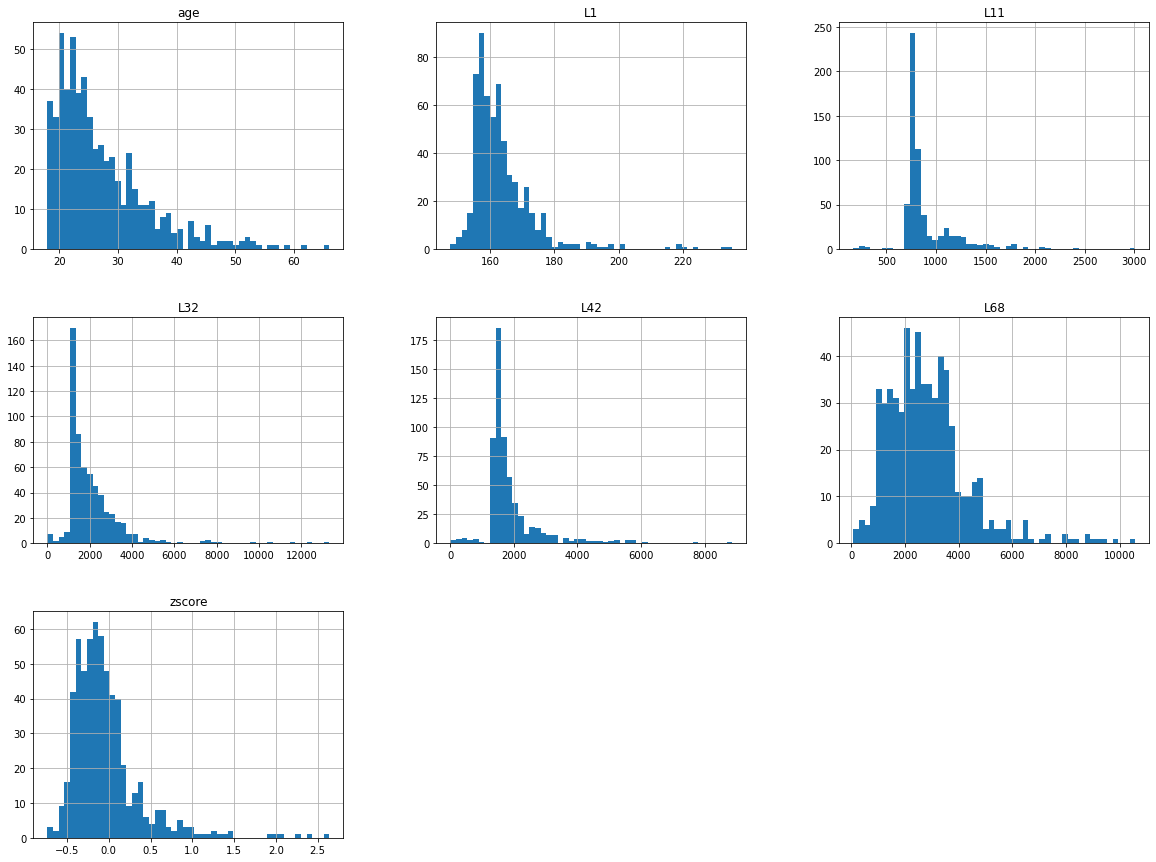

In [8]:
data=pd.concat([DF_player_info,DF_SHQ],axis=1)
data.hist(bins=50,figsize=(20,15))

In [9]:
corr_matrix=data.corr()
corr_matrix['zscore'].sort_values(ascending=False)

zscore    1.000000
L32       0.779062
L68       0.768446
L42       0.733872
L11       0.580070
age       0.253893
L1        0.113989
Name: zscore, dtype: float64

In [10]:
from sklearn.neighbors import LocalOutlierFactor

In [11]:
data

,subID,age,environment,street,city,still_live,city_current,city_current_type,gender,environment_current_binary,environment_binary,education,L1,L11,L32,L42,L68,zscore
0,545d67,24,City,Eureka Avenue,San Bernardino,Yes,San Bernardino,City,Male,City,City,Tertiary,160.142426,730.607327,1992.717912,1749.907687,1852.922407,-0.212190
1,558980,33,Suburbs,Third Ave,Croydon,Yes,Croydon,Suburban,Male,NonCity,NonCity,Secondary,155.142426,770.864075,2277.080180,1651.292803,1839.980958,-0.155626
2,55b312,53,Suburbs,Friar Avenue,Fayetteville,No,Port Richey,Suburban,Female,NonCity,NonCity,Tertiary,172.781746,1923.482954,3254.529641,1820.527369,7319.306439,0.776231
3,5642af,32,Suburbs,Waters Edge,Kissimmee,No,Orlando,Suburban,Male,NonCity,NonCity,Tertiary,165.142426,767.645531,1063.105672,1404.483244,1623.237126,-0.426406
4,564d1f,45,Rural,Bier Rd.,Oak Harbor,No,Oak Harbor,City,Male,City,NonCity,Tertiary,168.104221,748.000870,2328.359110,2141.255179,1367.460721,-0.200333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,6132bc,22,Suburbs,5th,Ecorse,No,Romulus,Suburban,Male,NonCity,NonCity,Tertiary,161.891018,752.077279,1203.237126,1427.412176,1779.805669,-0.376625
595,6132e2,30,Mix,Emperor,San Gabriel,No,Gardena,Suburban,Female,NonCity,NonCity,Tertiary,159.508446,886.267057,2558.916207,1816.951763,4639.373829,0.244243
596,613332,21,Suburbs,Brook Run,Louisville,Yes,Louisville,Suburban,Male,NonCity,NonCity,Secondary,158.962086,768.547231,1566.887708,1430.926492,2636.522848,-0.212182
597,61344e,20,Suburbs,Witham Court,Charlotte,Yes,Raleigh,Mixed,Female,Mixed,NonCity,Secondary,158.071358,750.864075,1309.428437,1526.155138,3948.230506,-0.066749


In [12]:
picked_trainset_2=data[['age','street','city','still_live','environment','education','zscore','gender']]
picked_trainset_2

,age,street,city,still_live,environment,education,zscore,gender
0,24,Eureka Avenue,San Bernardino,Yes,City,Tertiary,-0.212190,Male
1,33,Third Ave,Croydon,Yes,Suburbs,Secondary,-0.155626,Male
2,53,Friar Avenue,Fayetteville,No,Suburbs,Tertiary,0.776231,Female
3,32,Waters Edge,Kissimmee,No,Suburbs,Tertiary,-0.426406,Male
4,45,Bier Rd.,Oak Harbor,No,Rural,Tertiary,-0.200333,Male
...,...,...,...,...,...,...,...,...
594,22,5th,Ecorse,No,Suburbs,Tertiary,-0.376625,Male
595,30,Emperor,San Gabriel,No,Mix,Tertiary,0.244243,Female
596,21,Brook Run,Louisville,Yes,Suburbs,Secondary,-0.212182,Male
597,20,Witham Court,Charlotte,Yes,Suburbs,Secondary,-0.066749,Female


In [13]:
DF_entropy=pd.read_csv('./dataset/HomeAddressEntropy.csv')

In [14]:
DF_entropy

,address,environment,entropy_adjusted
0,"['Eureka Avenue, San Bernardino, USA'],",City,1.747190
1,"['bannister, houston, USA'],",City,1.912755
2,"['16th Street, Milwaukee, USA'],",City,1.583159
3,"['Dartmouth Drive, Anchorage, USA'],",City,2.722363
4,"['Coster Street, Bronx, USA'],",City,2.669455
...,...,...,...
594,"['Georgetowne Drive, Winder, USA'],",Suburbs,3.246128
595,"['Kingsbridge Road, Canton, USA'],",Suburbs,3.098634
596,"['5th, Ecorse, USA'],",Suburbs,2.572693
597,"['Brook Run, Louisville, USA'],",Suburbs,3.206085


In [15]:
 def numerical(picked_trainset_2):
    entropy=[]
    for i,row in picked_trainset_2.iterrows():
        if row['environment']=='City':
            picked_trainset_2.loc[i,'environment'] = 1 
        elif row['environment']=='Suburbs':
            picked_trainset_2.loc[i,'environment'] = 0.75 
        elif row['environment']=='Mix':
            picked_trainset_2.loc[i,'environment'] = 0.5
        elif row['environment']=='Rural':
            picked_trainset_2.loc[i,'environment'] = 0

        if row['education'] == 'Primary':
            picked_trainset_2.loc[i,'education'] = 1
        elif row['education'] == 'Secondary':
            picked_trainset_2.loc[i,'education'] = 2
        elif row['education'] == 'Tertiary':
            picked_trainset_2.loc[i,'education'] = 3

        if row['still_live'] == 'Primary':
            picked_trainset_2.loc[i,'education'] = 1
        elif row['education'] == 'Secondary':
            picked_trainset_2.loc[i,'education'] = 2

        if row['still_live'] == 'Yes':
            picked_trainset_2.loc[i,'still_live'] = 1
        elif row['still_live'] == 'No':
            picked_trainset_2.loc[i,'still_live'] = 0

        for it,row_e in DF_entropy.iterrows():
            temp=row_e['address'][:-3]
            temp=temp[2:]
            street=temp.split(',')[0]
            city=temp.split(',')[1]
            flag=False
            if row['street'] == street:
                entropy.append(row_e['entropy_adjusted'])
                flag=True
                break
        if not flag:
            entropy.append(-1)
    return entropy,picked_trainset_2

In [16]:
entropy,numerical_trianset=numerical(picked_trainset_2)

E:\Enviroment\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [17]:
numerical_trianset

,age,street,city,still_live,environment,education,zscore,gender
0,24,Eureka Avenue,San Bernardino,1,1,3,-0.212190,Male
1,33,Third Ave,Croydon,1,0.75,2,-0.155626,Male
2,53,Friar Avenue,Fayetteville,0,0.75,3,0.776231,Female
3,32,Waters Edge,Kissimmee,0,0.75,3,-0.426406,Male
4,45,Bier Rd.,Oak Harbor,0,0,3,-0.200333,Male
...,...,...,...,...,...,...,...,...
594,22,5th,Ecorse,0,0.75,3,-0.376625,Male
595,30,Emperor,San Gabriel,0,0.5,3,0.244243,Female
596,21,Brook Run,Louisville,1,0.75,2,-0.212182,Male
597,20,Witham Court,Charlotte,1,0.75,2,-0.066749,Female


In [18]:
numerical_trianset['entropy']=entropy

<ipython-input-18-ded92a9283fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_trianset['entropy']=entropy


In [19]:
numerical_trianset

,age,street,city,still_live,environment,education,zscore,gender,entropy
0,24,Eureka Avenue,San Bernardino,1,1,3,-0.212190,Male,1.747190
1,33,Third Ave,Croydon,1,0.75,2,-0.155626,Male,2.600974
2,53,Friar Avenue,Fayetteville,0,0.75,3,0.776231,Female,3.135833
3,32,Waters Edge,Kissimmee,0,0.75,3,-0.426406,Male,3.420753
4,45,Bier Rd.,Oak Harbor,0,0,3,-0.200333,Male,1.513117
...,...,...,...,...,...,...,...,...,...
594,22,5th,Ecorse,0,0.75,3,-0.376625,Male,2.572693
595,30,Emperor,San Gabriel,0,0.5,3,0.244243,Female,2.637167
596,21,Brook Run,Louisville,1,0.75,2,-0.212182,Male,3.206085
597,20,Witham Court,Charlotte,1,0.75,2,-0.066749,Female,3.534007


In [20]:
trainset=numerical_trianset.drop(['street','city'],axis=1)
trainset=trainset[pd.isnull(trainset['environment'])==False]
trainset=trainset[pd.isnull(trainset['education'])==False]
trainset=trainset[pd.isnull(trainset['zscore'])==False]
trainset=trainset[pd.isnull(trainset['still_live'])==False]
trainset=trainset[pd.isnull(trainset['entropy'])==False]

In [21]:
trainset

,age,still_live,environment,education,zscore,gender,entropy
0,24,1,1,3,-0.212190,Male,1.747190
1,33,1,0.75,2,-0.155626,Male,2.600974
2,53,0,0.75,3,0.776231,Female,3.135833
3,32,0,0.75,3,-0.426406,Male,3.420753
4,45,0,0,3,-0.200333,Male,1.513117
...,...,...,...,...,...,...,...
594,22,0,0.75,3,-0.376625,Male,2.572693
595,30,0,0.5,3,0.244243,Female,2.637167
596,21,1,0.75,2,-0.212182,Male,3.206085
597,20,1,0.75,2,-0.066749,Female,3.534007


In [103]:
male_set=trainset[trainset['gender']=='Male']
male_set_1=male_set[male_set['education']==2]
male_set_2=male_set[male_set['education']==3]
male_set_1.describe()

,age,zscore,entropy
count,127.000000,127.000000,127.000000
mean,25.952756,-0.192474,2.741200
std,8.202650,0.291932,0.789463
min,18.000000,-0.735261,-1.000000
25%,20.000000,-0.373853,2.404464
50%,23.000000,-0.233424,2.925681
75%,30.000000,-0.072647,3.311953
max,66.000000,0.972297,3.522404


In [104]:
male_set_2.describe()

,age,zscore,entropy
count,169.000000,169.000000,169.000000
mean,29.698225,-0.036776,2.654060
std,7.553622,0.492339,0.935967
min,18.000000,-0.593798,-1.000000
25%,24.000000,-0.354306,2.375779
50%,28.000000,-0.174486,2.938635
75%,34.000000,0.066688,3.245079
max,57.000000,2.639978,3.530850


In [114]:
female_set=trainset[trainset['gender']=='Female']
female_set_1=female_set[female_set['education']==2]
female_set_2=female_set[female_set['education']==3]
female_set_1.describe()


,age,zscore,entropy
count,88.000000,88.000000,88.000000
mean,22.397727,-0.025945,2.967022
std,6.139265,0.417747,0.532689
min,18.000000,-0.706381,0.693147
25%,19.000000,-0.261601,2.714574
50%,20.000000,-0.076707,3.125711
75%,24.000000,0.112145,3.335855
max,49.000000,2.048447,3.547181


In [107]:
female_set_2.describe()

,age,zscore,entropy
count,211.000000,211.000000,211.000000
mean,27.298578,0.040692,2.747324
std,8.210965,0.388633,0.898025
min,18.000000,-0.565663,-1.000000
25%,22.000000,-0.197844,2.473502
50%,25.000000,-0.053971,3.012951
75%,29.000000,0.121932,3.305086
max,62.000000,1.977859,3.558401


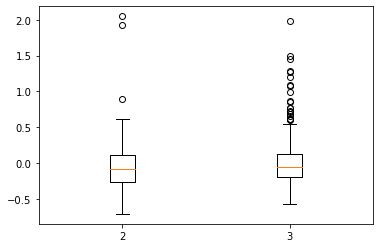

In [113]:
def draw_box(ans):
    plt.boxplot(ans,labels=['2','3'])
    plt.show()
draw_box(fe)

In [22]:
corr_matrix=trainset.corr()
corr_matrix['zscore'].sort_values(ascending=False)

zscore     1.000000
age        0.253826
entropy   -0.084679
Name: zscore, dtype: float64

In [23]:
# from sklearn.cluster import KMeans
# from sklearn import metrics
# k_means=KMeans(n_clusters=3, random_state=10)
# k_means.fit(trainset)
# y_predict=k_means.predict(trainset)
# from sklearn.manifold import TSNE
# tsne=TSNE(n_components=2,init='random',random_state=177).fit(trainset)
# df=pd.DataFrame(tsne.embedding_)
# df['labels']=k_means.labels_
# df1=df[df['labels']==0]
# df2=df[df['labels']==1]
# df3=df[df['labels']==2]
# fig=plt.figure(figsize=(9,6))
# plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',df3[0],df3[1],'gD')
# plt.show()

In [24]:
sub_trainset_1=trainset[['zscore','entropy','gender']] # Zscore & Entropy
sub_trainset_2=trainset[['zscore','age','gender']] # Zscore & Age
sub_trainset_3=trainset[['zscore','education','gender']] # Zscore and Education
sub_trainset_4=trainset[['zscore','environment','gender']] # Zscore and Enviroment

In [25]:
def find_outliers(train_set,k,method,label_a,label_b):
    outliers,inliers=lof(train_set, k=100, method = 1)
    plt.figure(figsize=(10,10))
    plt.scatter(list(train_set[label_a]),list(train_set[label_b]),s = 10,c='b',alpha = 0.5)
    plt.scatter(outliers[label_a],outliers[label_b],s=10+outliers['local outlier factor']*100,c='r',alpha=0.2)
    plt.xlabel(label_a)
    plt.ylabel(label_b)
    plt.legend()
    plt.show()

1. correlation系数,绝对值
2. 批量研究两两之间联系，单因素和结果之间的相关关系
3. 以zscore作为label
4. SNE，Gaussin
5. 单要素的时间空间维度分析
6. box
7. 找到一种分布去拟合zscore的分布

In [26]:
trainset.info

<bound method DataFrame.info of      age still_live environment education    zscore  gender   entropy
0     24          1           1         3 -0.212190    Male  1.747190
1     33          1        0.75         2 -0.155626    Male  2.600974
2     53          0        0.75         3  0.776231  Female  3.135833
3     32          0        0.75         3 -0.426406    Male  3.420753
4     45          0           0         3 -0.200333    Male  1.513117
..   ...        ...         ...       ...       ...     ...       ...
594   22          0        0.75         3 -0.376625    Male  2.572693
595   30          0         0.5         3  0.244243  Female  2.637167
596   21          1        0.75         2 -0.212182    Male  3.206085
597   20          1        0.75         2 -0.066749  Female  3.534007
598   18          0         0.5         2  0.101045    Male  1.755509

[595 rows x 7 columns]>

In [27]:
trainset.astype({'education':'float64','environment':'float64','still_live':'float64'}).dtypes

age              int64
still_live     float64
environment    float64
education      float64
zscore         float64
gender          object
entropy        float64
dtype: object

In [28]:
# Analysis of Age & Zscore
# Using Dataset sub_trainset2
def analysis_Age_zscore(trainset):
    male=trainset[trainset['gender']=='Male'][['age','zscore']]
    female=trainset[trainset['gender']=='Female'][['age','zscore']]
#     parameter = np.polyfit(male['age'], male['zscore'], 1)
#     p = np.poly1d(parameter)
#     plt.scatter(male['age'], male['zscore'])
#     plt.plot(male['age'], p(male['age']), color='r')
#     plt.show()
    division_1_male=male[male['age']<=20]['zscore']
    division_2_male=male[male['age']<=30]
    division_2_male=division_2_male[division_2_male['age']>20]['zscore']
    division_3_male=male[male['age']<=40]
    division_3_male=division_3_male[division_3_male['age']>30]['zscore']
    division_4_male=male[male['age']<=50]
    division_4_male=division_4_male[division_4_male['age']>40]['zscore']
    division_5_male=male[male['age']<=60]
    division_5_male=division_5_male[division_5_male['age']>50]['zscore']
    division_6_male=male[male['age']>60]
#     age_groups=[]
#     for i,row in male.iterrows():
#         if row['age'] <=20:
#             age_groups.append(1)
#         elif row['age'] <=30 and row['age'] > 20:
#             age_groups.append(2) 
#         elif row['age'] <=40 and row['age'] > 30:
#             age_groups.append(3) 
#         elif row['age'] <=50 and row['age'] > 40:
#             age_groups.append(4) 
#         elif row['age'] > 50:
#             age_groups.append(5) 
    ans=[]
    ans.append(division_1_male.to_numpy())
    ans.append(division_2_male.to_numpy())
    ans.append(division_3_male.to_numpy())
    ans.append(division_4_male.to_numpy())
    ans.append(division_5_male.to_numpy())
    # ans.append(division_6_male.to_numpy())
    
    fig=plt.figure()
    plt.title('Performance of Male',fontsize=15)
    plt.boxplot(ans,labels=['<=20','20-30','30-40','40-50','50+'],whis=3)
#     ax1=plt.subplot(121)
#     ax1.boxplot(male[male['age']<=20]['zscore'])
#     ax1.title(('<=20')
    plt.xlabel('Age Group',fontsize=15)
    plt.ylabel('zscore',fontsize=15)
    plt.legend()
    plt.show()
    # print(division_2_male)

No handles with labels found to put in legend.


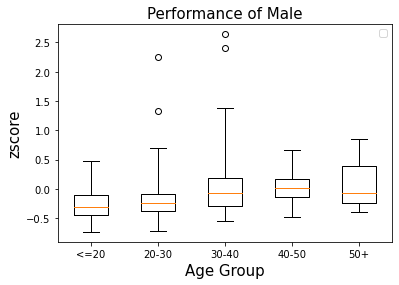

In [29]:
analysis_Age_zscore(sub_trainset_2)

In [30]:
def analysis_Age_zscore(trainset):
    male=trainset[trainset['gender']=='Male'][['age','zscore']]
    female=trainset[trainset['gender']=='Female'][['age','zscore']]
#     parameter = np.polyfit(male['age'], male['zscore'], 1)
#     p = np.poly1d(parameter)
#     plt.scatter(male['age'], male['zscore'])
#     plt.plot(male['age'], p(male['age']), color='r')
#     plt.show()
    division_1_female=female[female['age']<=20]['zscore']
    division_2_female=female[female['age']<=30]
    division_2_female=division_2_female[division_2_female['age']>20]['zscore']
    division_3_female=female[female['age']<=40]
    division_3_female=division_3_female[division_3_female['age']>30]['zscore']
    division_4_female=female[female['age']<=50]
    division_4_female=division_4_female[division_4_female['age']>40]['zscore']
    division_5_female=female[female['age']<=60]
    division_5_female=division_5_female[division_5_female['age']>50]['zscore']
    division_6_female=female[female['age']>60]
#     age_groups=[]
#     for i,row in male.iterrows():
#         if row['age'] <=20:
#             age_groups.append(1)
#         elif row['age'] <=30 and row['age'] > 20:
#             age_groups.append(2) 
#         elif row['age'] <=40 and row['age'] > 30:
#             age_groups.append(3) 
#         elif row['age'] <=50 and row['age'] > 40:
#             age_groups.append(4) 
#         elif row['age'] > 50:
#             age_groups.append(5) 
    ans=[]
    ans.append(division_1_female.to_numpy())
    ans.append(division_2_female.to_numpy())
    ans.append(division_3_female.to_numpy())
    ans.append(division_4_female.to_numpy())
    ans.append(division_5_female.to_numpy())
    # ans.append(division_6_male.to_numpy())
    
    fig=plt.figure()
    plt.title('Performance of Female',fontsize=15)
    plt.boxplot(ans,labels=['<=20','20-30','30-40','40-50','50+'],whis=3)
#     ax1=plt.subplot(121)
#     ax1.boxplot(male[male['age']<=20]['zscore'])
#     ax1.title(('<=20')
    plt.xlabel('Age Group',fontsize=15)
    plt.ylabel('zscore',fontsize=15)
    plt.legend()
    plt.show()
    # print(division_2_male)

No handles with labels found to put in legend.


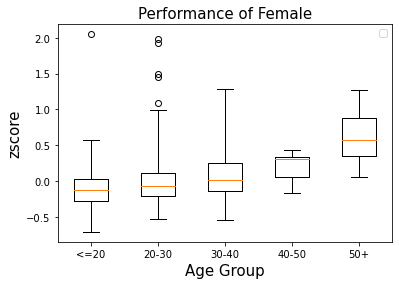

In [31]:
analysis_Age_zscore(sub_trainset_2)

In [32]:
def localoutlierfactor(data, predict, k, con):
    clf = LocalOutlierFactor(n_neighbors=k + 1, algorithm='auto', contamination=con, n_jobs=-1)
    clf.fit(data)
    # 记录 k 邻域距离
    predict['k distances'] = clf.kneighbors(predict)[0].max(axis=1)
    # 记录 LOF 离群因子，做相反数处理
    predict['local outlier factor'] = -clf._decision_function(predict.iloc[:, :-1])
    return predict

def plot_lof(result, method):
    plt.rcParams['axes.unicode_minus'] = False  
    plt.figure(figsize=(8, 4)).add_subplot(111)
    plt.scatter(result[result['local outlier factor'] > method].index,
                result[result['local outlier factor'] > method]['local outlier factor'], c='red', s=50,
                marker='.', alpha=None,
                label='Outliers')
    plt.scatter(result[result['local outlier factor'] <= method].index,
                result[result['local outlier factor'] <= method]['local outlier factor'], c='black', s=50,
                marker='.', alpha=None, label='Normal Point')
    plt.hlines(method, -2, 2 + max(result.index), linestyles='--')
    plt.xlim(-2, 2 + max(result.index))
    plt.title('LOF', fontsize=13)
    plt.ylabel('Local Outlier Factor', fontsize=15)
    plt.legend()
    plt.show()

def lof(data, predict=None, k=5, method=1, plot=False,contamination=0.2):
    try:
        if predict == None:
            predict = data.copy()
    except Exception:
        pass
    predict = pd.DataFrame(predict)
    
    predict = localoutlierfactor(data, predict, k, contamination)
    outlier_s = predict[predict['local outlier factor'] > method].sort_values(by='local outlier factor')
    inlier_s = predict[predict['local outlier factor'] <= method].sort_values(by='local outlier factor')
    return outlier_s, inlier_s

In [33]:
def get_outlier_cluster(dataset,par,k_value,con):
    outliers,inliers=lof(dataset,k=k_value,contamination=con)
    fig=plt.figure(figsize=(10,10))
    plt.scatter(outliers[par],outliers['zscore'],c='r')
    plt.scatter(outliers[par],outliers['zscore'],s=10+outliers['local outlier factor']*100,c='r',alpha=0.2)
    plt.scatter(inliers[par],inliers['zscore'],c='b')
    plt.xlabel(par,fontsize=20)
    plt.ylabel('zscore',fontsize=20)
    plt.show()
    return outliers,inliers

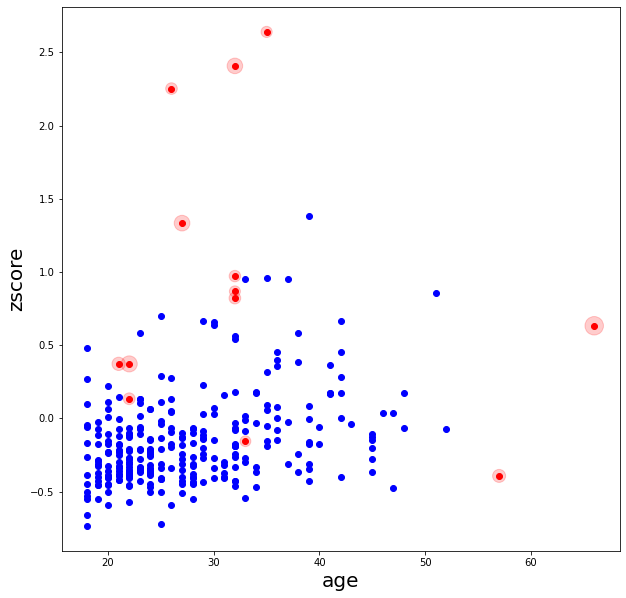

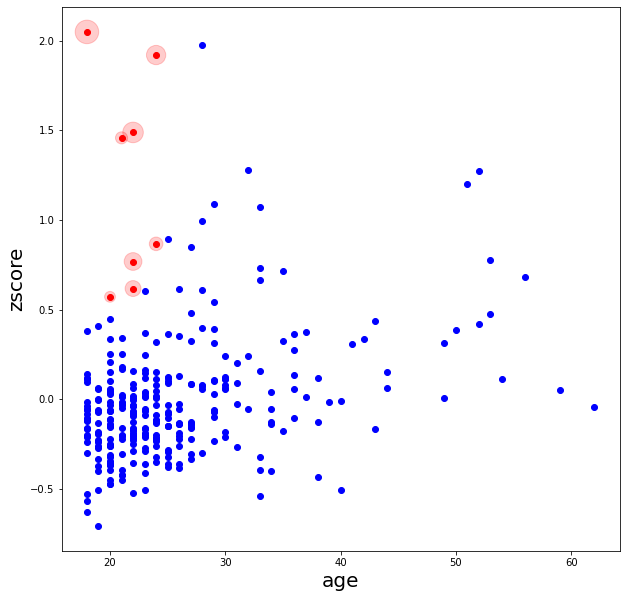

     age    zscore  k distances  local outlier factor
1     33 -0.155626     1.000595              1.066373
184   32  0.867905     1.042392              1.116073
564   35  2.639978     2.653309              1.148565
5     32  0.972297     1.146783              1.222439
364   26  2.252917     2.365208              1.249526
165   32  0.821780     1.001218              1.269781
8     22  0.134555     0.410328              1.288353
524   57 -0.392502    12.000571              1.597494
151   21  0.372904     0.619983              1.674295
382   32  2.407789     2.474848              2.329481
161   27  1.333780     1.624970              2.362723
167   22  0.372463     0.648235              2.496393
177   66  0.632805    21.013659              3.326428
     age    zscore  k distances  local outlier factor
296   20  0.571775     0.638524              1.070778
221   21  1.457812     1.500655              1.366257
534   24  0.867011     1.033933              1.745832
436   22  0.617872     0.744

In [34]:
male=trainset[trainset['gender']=='Male'][['age','zscore']]
female=trainset[trainset['gender']=='Female'][['age','zscore']]
male_outlier_age,male_inlier_age=get_outlier_cluster(male,'age',10,0.5)
female_outlier_age,female_inlier_age=get_outlier_cluster(female,'age',15,0.2)
print(male_outlier_age)
print(female_outlier_age)

In [35]:
# analysis of entropy vs zscore (male&female)
def analysis_entropy_zscore(trainset):
    male=trainset[trainset['gender']=='Male'][['entropy','zscore']]
    female=trainset[trainset['gender']=='Female'][['entropy','zscore']]
    male_outlier,male_inlier=get_outlier_cluster(male,'entropy',9,0.25)
    female_outlier,female_inlier=get_outlier_cluster(female,'entropy',9,0.3)
    return male_outlier,male_inlier,female_outlier,female_inlier

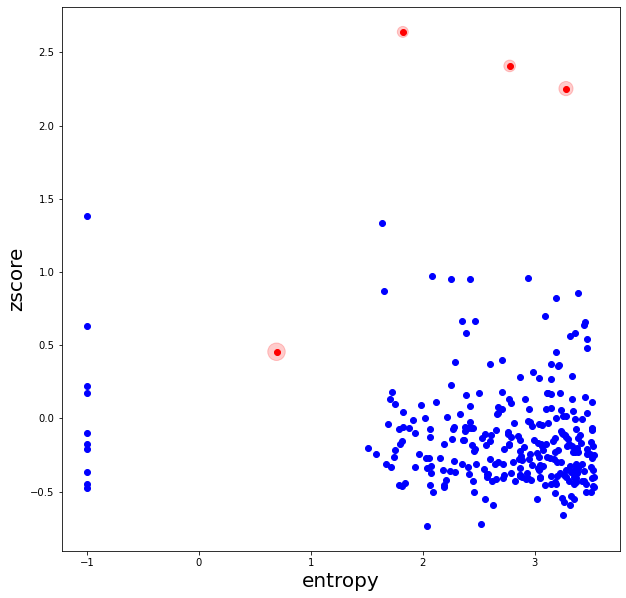

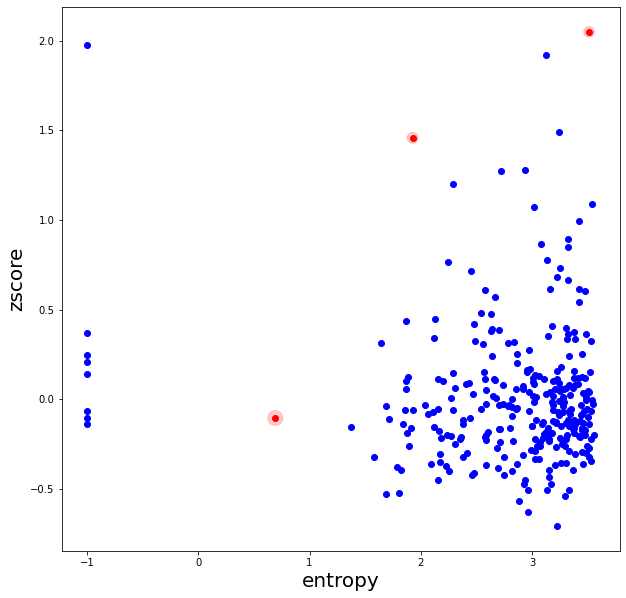

      entropy    zscore  k distances  local outlier factor
564  1.821266  2.639978     2.042684              1.105435
382  2.775784  2.407789     1.665479              1.261496
364  3.278679  2.252917     1.620856              1.903631
381  0.693147  0.455496     1.212862              2.966139
      entropy    zscore  k distances  local outlier factor
447  3.512943  2.048447     1.211968              1.018032
221  1.926550  1.457812     1.134271              1.076405
259  0.693147 -0.104164     1.163732              2.113241


In [36]:
male_outlier_entropy,male_inlier_entropy,female_outlier_entropy,female_inlier_entropy=analysis_entropy_zscore(sub_trainset_1)
print(male_outlier_entropy)
print(female_outlier_entropy)

In [37]:
# analysis of education vs zscore
def analysis_education_zscore(trainset):
    male=trainset[trainset['gender']=='Male'][['education','zscore']]
    female=trainset[trainset['gender']=='Female'][['education','zscore']]
    male_outlier,male_inlier=get_outlier_cluster(male,'education',10,0.2)
    female_outlier,female_inlier=get_outlier_cluster(female,'education',9,0.3)
    return male_outlier,male_inlier,female_outlier,female_inlier

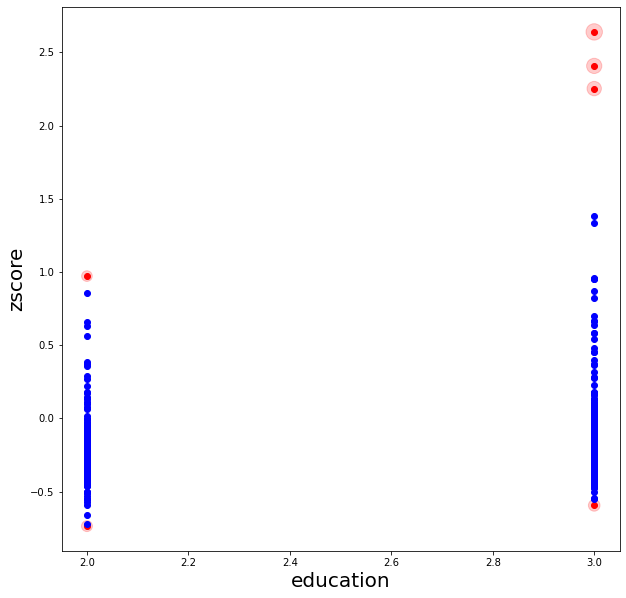

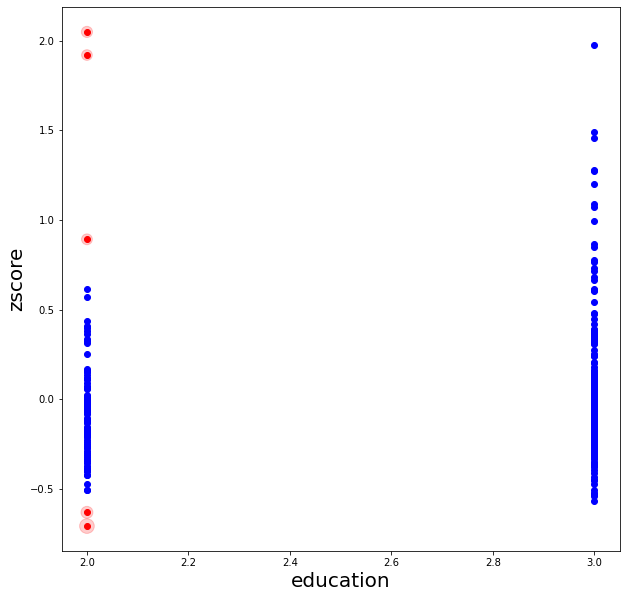

    education    zscore  k distances  local outlier factor
5           2  0.972297     0.748192              1.045940
443         2 -0.735261     0.232055              1.107284
263         3 -0.593798     0.148522              1.259859
364         3  2.252917     1.555356              1.971378
382         3  2.407789     1.710228              2.225976
564         3  2.639978     1.942417              2.607679
    education    zscore  k distances  local outlier factor
475         2  1.919512     1.300308              1.042854
217         2  0.892293     0.568915              1.073602
447         2  2.048447     1.386273              1.144424
512         2 -0.629791     0.235233              1.337996
234         2 -0.706381     0.311823              2.056453


In [38]:
male_outlier_education,male_inlier_education,female_outlier_education,female_inlier_education=analysis_education_zscore(sub_trainset_3)
print(male_outlier_education)
print(female_outlier_education)

In [85]:
#male_inlier_education[male_inlier_education['education']==3]['zscore'].max() # 2-0.856628648968289  3-1.38316275802355
#male_outlier_education[male_outlier_education['education']==3]['zscore'].max() # 2-0.9722967619781541  3-2.63997770636884
#female_inlier_education[female_inlier_education['education']==3]['zscore'].max() # 2-0.613094307875824 3-1.97785920474968
female_outlier_education[female_outlier_education['education']==3]['zscore'].max() # 2-2.04844667296104 3-0

nan

In [89]:
#male_inlier_education[male_inlier_education['education']==3]['zscore'].max() # 2-0.856628648968289  3-1.38316275802355
#male_outlier_education[male_outlier_education['education']==3]['zscore'].max() # 2-0.9722967619781541  3-2.63997770636884
# female_inlier_education[female_inlier_education['education']==2]['zscore'].describe() # 2-0.613094307875824 3-1.97785920474968
# female_outlier_education[female_outlier_education['education']==2]['zscore'].describe() # 2-2.04844667296104 3-0

count    83.000000
mean     -0.069966
std       0.253345
min      -0.504259
25%      -0.254493
50%      -0.082537
75%       0.083114
max       0.613094
Name: zscore, dtype: float64

In [96]:
male_1=trainset[trainset['gender']=='female']
male_1

,age,still_live,environment,education,zscore,gender,entropy


In [ ]:
male_max=[0.9722967619781541,2.63997770636884]
male_avg=[]
female_max=[2.04844667296104,1.97785920474968]
female_avg=[-0.069966,0.040692]

In [40]:
# analysis of environment vs zscore
def analysis_environment_zscore(trainset):
    male=trainset[trainset['gender']=='Male'][['environment','zscore']]
    female=trainset[trainset['gender']=='Female'][['environment','zscore']]
    male_outlier,male_inlier=get_outlier_cluster(male,'environment',10,0.2)
    female_outlier,female_inlier=get_outlier_cluster(female,'environment',15,0.2)
    return male_outlier,male_inlier,female_outlier,female_inlier

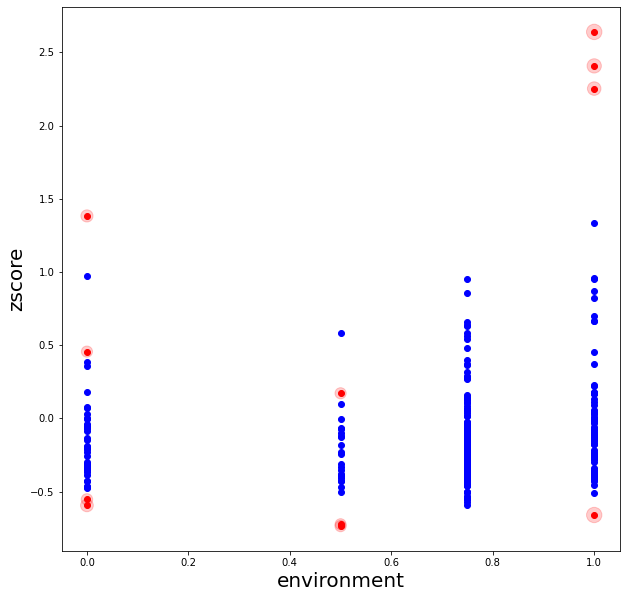

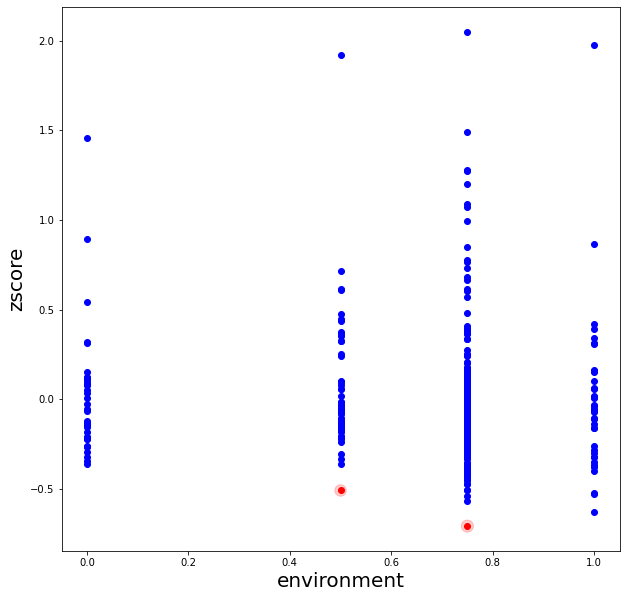

    environment    zscore  k distances  local outlier factor
591         0.5 -0.722083     0.305404              1.114584
70          0.5  0.171933     0.257636              1.150773
189           0  0.456439     0.510792              1.152155
443         0.5 -0.735261     0.313160              1.177419
548           0 -0.552841     0.211809              1.211352
551           0  1.383163     1.055495              1.386130
263           0 -0.593798     0.252766              1.534080
364           1  2.252917     1.431137              1.735820
382           1  2.407789     1.586009              1.954171
238           1 -0.659491     0.264877              2.258807
564           1  2.639978     1.818198              2.284546
    environment    zscore  k distances  local outlier factor
494         0.5 -0.507956     0.268688              1.222059
234        0.75 -0.706381     0.309538              1.370136


In [41]:
male_outlier_environment,male_inlier_environment,female_outlier_environment,female_inlier_environment=analysis_environment_zscore(sub_trainset_4)
print(male_outlier_environment)
print(female_outlier_environment)

In [42]:
cf_score={}

In [43]:
for i in male_inlier_environment.iterrows():
    print(i[1])

environment                  0.5
zscore                 -0.312198
k distances             0.116468
local outlier factor   -0.217823
Name: 223, dtype: object
environment                  0.5
zscore                 -0.331885
k distances             0.106003
local outlier factor   -0.217823
Name: 580, dtype: object
environment                  0.5
zscore                 -0.244274
k distances             0.142276
local outlier factor   -0.199789
Name: 527, dtype: object
environment                  0.75
zscore                  -0.299812
k distances             0.0228953
local outlier factor    -0.191033
Name: 204, dtype: object
environment                  0.75
zscore                  -0.445276
k distances             0.0117448
local outlier factor    -0.187154
Name: 141, dtype: object
environment                 0.75
zscore                  -0.44851
k distances             0.014979
local outlier factor   -0.187154
Name: 148, dtype: object
environment                     1
zscore          

In [44]:
for i in male_inlier_age.iterrows():
    name=i[0]
    lof = abs(i[1][3])
    cf_score[name] = lof * 0.2357 # corr
for i in male_outlier_age.iterrows():
    name=i[0]
    lof = abs(i[1][3])
    cf_score[name] = lof * 0.2357
for i in male_inlier_entropy.iterrows():
    name=i[0]
    lof = abs(i[1][3])
    cf_score[name] += lof * 0.08467
for i in male_outlier_entropy.iterrows():
    name=i[0]
    lof = abs(i[1][3])
    cf_score[name] += lof * 0.08467
for i in male_inlier_environment.iterrows():
    name=i[0]
    lof = abs(i[1][3])
    cf_score[name] += lof * 0.10354
    
for i in male_outlier_environment.iterrows():
    name=i[0]
    lof = abs(i[1][3])
    cf_score[name] += lof * 0.10354
for i in male_inlier_education.iterrows():
    name=i[0]
    lof = abs(i[1][3])
    cf_score[name] += lof * 0.04049
    
for i in male_outlier_education.iterrows():
    name=i[0]
    lof = abs(i[1][3])
    cf_score[name] += lof * 0.04049

In [45]:
print(cf_score.keys())

dict_keys([31, 282, 39, 127, 98, 505, 295, 142, 392, 413, 129, 571, 363, 429, 506, 306, 261, 69, 40, 99, 143, 41, 293, 55, 65, 134, 137, 14, 94, 172, 480, 594, 220, 411, 586, 105, 561, 367, 104, 96, 371, 103, 470, 596, 527, 529, 30, 456, 154, 476, 128, 352, 116, 525, 309, 48, 120, 332, 17, 457, 493, 136, 180, 516, 102, 146, 74, 52, 186, 87, 531, 375, 118, 399, 36, 32, 570, 35, 312, 274, 266, 320, 203, 159, 538, 314, 26, 54, 9, 315, 298, 78, 219, 303, 117, 533, 598, 286, 188, 546, 543, 260, 90, 526, 150, 91, 121, 191, 330, 557, 86, 578, 550, 212, 250, 79, 532, 469, 153, 567, 247, 50, 97, 502, 148, 176, 554, 187, 113, 70, 173, 112, 149, 499, 126, 141, 408, 563, 49, 238, 73, 189, 108, 513, 107, 182, 171, 46, 417, 131, 132, 559, 23, 152, 584, 381, 28, 207, 337, 406, 198, 0, 63, 215, 67, 43, 438, 62, 12, 111, 573, 556, 76, 164, 185, 539, 37, 155, 418, 583, 59, 60, 4, 558, 325, 33, 542, 64, 482, 562, 24, 135, 223, 3, 580, 80, 110, 16, 515, 44, 443, 115, 340, 27, 18, 379, 432, 548, 45, 478, 4

In [46]:
cf_value=[]
for i in cf_score.keys():
    cf_value.append(cf_score[i])
cf_value

[0.0683905529420207,
 0.06668924485211564,
 0.05926650358997946,
 0.04691518088416922,
 0.05259332446676999,
 0.04084139134560921,
 0.07695579713376745,
 0.04742164980731916,
 0.04478554556020286,
 0.053930648945941226,
 0.03983749778487015,
 0.05268946006495831,
 0.04325696562605614,
 0.0453949082018461,
 0.046971330626453804,
 0.05364177430345923,
 0.05096384291353783,
 0.052781692392892605,
 0.038444809960816374,
 0.05250558220870125,
 0.04632849528262387,
 0.0423595150843885,
 0.040202485448884134,
 0.04968613408405268,
 0.03845355852633662,
 0.0352884553575069,
 0.04637847758925473,
 0.04859866241209694,
 0.039109049975873195,
 0.05473520186898814,
 0.048112964804325455,
 0.052210520692073825,
 0.05334290999621467,
 0.039666497338035296,
 0.03657298766195765,
 0.0487011489763083,
 0.04637898279625224,
 0.05381060567662549,
 0.041483955490212374,
 0.050856267442956654,
 0.045393988633767944,
 0.03827994979706291,
 0.04143254922997659,
 0.04214577570859086,
 0.04557493626204017,
 0.

Text(0, 0.5, 'Number')

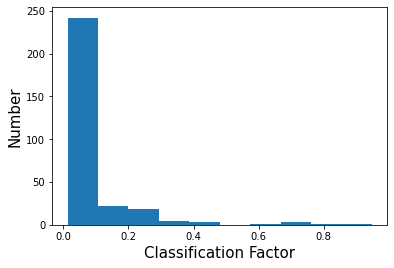

In [47]:
plt.hist(cf_value,bins=10)
plt.xlabel('Classification Factor',fontsize=15)
plt.ylabel('Number',fontsize=15)

In [48]:
print('Index ClassificationFactor')
for i in cf_score.keys():
    if cf_score[i]>0.5:
        print (i,end='   ')
        print (numerical_trianset['zscore'][i])

Index ClassificationFactor
564   2.63997770636884
364   2.25291684955924
382   2.40778859055771
161   1.3337802011106898
167   0.37246295290543696
177   0.632805176025531


$$Classification Factor = \sum_{i=1}^{N}{Local Outlier Factor(x) \times \frac{Cov(x,zscore)}{\sqrt{D(x)}\times \sqrt{D(zscore)}}}$$

$$LocalOutlierFactor(x)=\frac{\sum_{N_k(x)}{\frac{lrd(o)}{lrd(x)}}} {|N_k(x)|}$$

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.linear_model import RidgeCV
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [50]:
regre_dataset=DF_SHQ.drop(['zscore'],axis=1)
regre_dataset

,L1,L11,L32,L42,L68
0,160.142426,730.607327,1992.717912,1749.907687,1852.922407
1,155.142426,770.864075,2277.080180,1651.292803,1839.980958
2,172.781746,1923.482954,3254.529641,1820.527369,7319.306439
3,165.142426,767.645531,1063.105672,1404.483244,1623.237126
4,168.104221,748.000870,2328.359110,2141.255179,1367.460721
...,...,...,...,...,...
594,161.891018,752.077279,1203.237126,1427.412176,1779.805669
595,159.508446,886.267057,2558.916207,1816.951763,4639.373829
596,158.962086,768.547231,1566.887708,1430.926492,2636.522848
597,158.071358,750.864075,1309.428437,1526.155138,3948.230506


In [51]:
x_train=regre_dataset.drop(['L68'],axis=1)
label=regre_dataset['L68']

In [52]:
def cross_val(reg_model, data, label):
    scores = cross_val_score(reg_model, data, label,
                             scoring="neg_mean_squared_error", cv=10)
    model_score = np.sqrt(-(scores))
    print('Scores:',model_score)
    print('Mean:',model_score.mean())
    print('Standard deviation:',model_score.std())
    return model_score.mean()

In [53]:
# Linear Regression
def OLS_Regre(x_train,label):
    model=LinearRegression()
    model.fit(x_train,label)
    mean = cross_val(model,x_train,label)
    return model

In [54]:
def fit_Ridge_model(data, target):
    model = RidgeCV(alphas=[0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7, 9, 20, 50, 100]) # Test which alpha has better performance
    model.fit(data, target)
    mean = cross_val(model, data, target)
    print("Best score for Ridge model is: ",mean)
    print("Best alpha for Ridge model is: ",model.alpha_)
    return model

In [55]:
def fit_Lasso_model(data,target):
    min_mae=10000
    alpha=1
    best_model=None
    best_score=0
    while(alpha>=0): # change alpha from 1-0, step_length = 0.001
        alpha-=0.001
        model=Lasso(alpha)
        model.fit(data,target)
        mean = cross_val(model,data,target)
        if min_mae >= mean:
            min_mae = mean
            best_model=model
    print("Best score for Lasso model is: ",min_mae)
    print("Best alpha for Lasso model is: %.3f" % best_model.alpha)
    return best_model

In [56]:
def fit_RF_model(max_estimators,random_state,data,target):
    best_model=None
    best_estimator=0
    min_mae=10000
    for i in range (2,max_estimators):
        RF_model=RandomForestRegressor(n_estimators=i,random_state=random_state)
        RF_model.fit(data,target)
        mean=cross_val(RF_model,data,target)
        if mean<min_mae:
            min_mae=mean
            best_estimator=i
            best_model=RF_model
    print("Best n_estimators is: ",best_estimator)
    print("Score: ",min_mae)
    return best_model

In [57]:
def fit_RF_model(max_estimators,random_state,data,target):
    best_model=None
    best_estimator=0
    min_mae=10000
    for i in range (2,max_estimators):
        RF_model=RandomForestRegressor(n_estimators=i,random_state=random_state)
        RF_model.fit(data,target)
        mean=cross_val(RF_model,data,target)
        if mean<min_mae:
            min_mae=mean
            best_estimator=i
            best_model=RF_model
    print("Best n_estimators is: ",best_estimator)
    print("Score: ",min_mae)
    return best_model

In [58]:
OLS_model=OLS_Regre(x_train,label)

Scores: [1076.7281878  1115.91947125 1200.30455582 1284.18123011 1081.52995638
 1040.4035559  1737.57078454 1599.32876371 1250.28976687 1215.53555274]
Mean: 1260.1791825124233
Standard deviation: 219.96797661041523


In [59]:
Ridge_model=fit_Ridge_model(x_train,label)

Scores: [1076.7839608  1115.77294575 1200.21536421 1284.27338586 1081.43383682
 1040.38366247 1737.6000125  1599.3249058  1250.3141314  1215.51329702]
Mean: 1260.1615502618001
Standard deviation: 219.99226257221437
Best score for Ridge model is:  1260.1615502618001
Best alpha for Ridge model is:  100.0


In [60]:
Lasso_model=fit_Lasso_model(x_train,label)

Scores: [1076.74987161 1115.88092595 1200.27942452 1284.22758054 1081.5025703
 1040.3974658  1737.58037972 1599.32758055 1250.29810985 1215.5290875 ]
Mean: 1260.177299632986
Standard deviation: 219.97471347488653
Scores: [1076.74984981 1115.88096453 1200.27944968 1284.22753395 1081.50259793
 1040.39747182 1737.58037069 1599.32758161 1250.29810154 1215.52909387]
Mean: 1260.1773015427625
Standard deviation: 219.97470683312523
Scores: [1076.74982801 1115.88100312 1200.27947484 1284.22748737 1081.50262555
 1040.39747784 1737.58036166 1599.32758267 1250.29809323 1215.52910024]
Mean: 1260.1773034525472
Standard deviation: 219.97470019136512
Scores: [1076.74980621 1115.8810417  1200.27949999 1284.22744079 1081.50265318
 1040.39748386 1737.58035263 1599.32758372 1250.29808492 1215.52910661]
Mean: 1260.1773053623408
Standard deviation: 219.9746935496065
Scores: [1076.74978441 1115.88108029 1200.27952515 1284.22739421 1081.50268081
 1040.39748989 1737.5803436  1599.32758478 1250.29807661 1215.52

E:\Enviroment\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472639570.16366065, tolerance: 136927.86264029265
  model = cd_fast.enet_coordinate_descent(
E:\Enviroment\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438314300.1379548, tolerance: 127179.21667080326
  model = cd_fast.enet_coordinate_descent(
E:\Enviroment\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436030314.394421, tolerance: 125997.42350356773
  model = cd_fast.enet_coordinate_descent(
E:\Enviroment\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Ob

In [61]:
RF_model=fit_RF_model(100,0,x_train,label)

Scores: [1435.29230944 1380.54481901 1311.67847485 1676.55230711 1487.10685046
 1362.66916395 1827.08708255 1800.10256454 1588.20125651 1296.51973715]
Mean: 1516.5754565587447
Standard deviation: 186.44089184950204
Scores: [1318.66000657 1355.12107408 1252.62161509 1570.64046904 1439.94519947
 1238.4385077  1852.98902379 1736.60506709 1453.59980136 1252.21930007]
Mean: 1447.084006424784
Standard deviation: 202.04248798649846
Scores: [1257.29336259 1275.60025414 1260.99649125 1553.30112127 1336.1222048
 1229.34487511 1862.35854224 1828.59730998 1461.00892763 1258.20628591]
Mean: 1432.2829374912187
Standard deviation: 228.63595004060787
Scores: [1290.69883545 1302.20791    1223.89300548 1503.69649599 1215.13116032
 1169.36074261 1834.47042658 1875.67372563 1443.21434402 1304.22635191]
Mean: 1416.2572997998745
Standard deviation: 239.5985699533539
Scores: [1310.85237501 1280.90590644 1183.83680262 1438.36135835 1176.10039051
 1134.17104868 1878.14306401 1860.13378585 1476.28542091 1274.06

In [62]:
import gzip
import json

In [63]:
complete_dataset_path='D:\\Studies\\MSc\\MSc Project\\dataset\\2019-12-16-latest-level.json.gz'
f=gzip.open(complete_dataset_path)
complete_dataset=[]
cnt=0
while 1:
    if cnt==200:
        break
    line=f.readline()
    tmp=line.decode()
    complete_dataset.append(tmp)
    cnt+=1
f.close()
j=json.loads(complete_dataset[1])
print(j)

{'uuid': '523a165e-53d6-4002-82d8-ec797d62df70', 'stored_at': '2018-04-08T15:23:33+00:00', 'duration': 14.1018448, 'level_instance_json': {'meta': {'user_id': 0, 'level_id': 1, 'duration': 14.1018448, 'previous_attempts': 1, 'early_termination': False, 'platform': 'iOS', 'app_version': '1.7.0', 'map_view_duration': 3.200386}, 'events': {'0': {'time': 0, 'type': 'landmark', 'id': 7, 'visible': True}, '1': {'time': 0, 'type': 'landmark', 'id': 9, 'visible': True}, '2': {'time': 0, 'type': 'landmark', 'id': 10, 'visible': True}, '3': {'time': 0, 'type': 'landmark', 'id': 11, 'visible': True}, '4': {'time': 0, 'type': 'landmark', 'id': 12, 'visible': True}, '5': {'time': 0, 'type': 'landmark', 'id': 15, 'visible': True}, '6': {'time': 0, 'type': 'landmark', 'id': 16, 'visible': True}, '7': {'time': 0, 'type': 'landmark', 'id': 17, 'visible': True}, '8': {'time': 0, 'type': 'landmark', 'id': 18, 'visible': True}, '9': {'time': 0, 'type': 'landmark', 'id': 22, 'visible': True}, '10': {'time'